In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)  # check the TF version!
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import IPython
import IPython.display
plt.style.use('seaborn-colorblind')
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
from sklearn.model_selection import train_test_split


2.7.0


In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
csv_path = tf.keras.utils.get_file(
    origin='https://reed.cs.depaul.edu/peterh/Essays/Metro_Interstate_reduced.csv',
    fname='Metro_Interstate_reduced.csv',
    cache_dir='/content', cache_subdir='sample_data')

csv_path

'/content/sample_data/Metro_Interstate_reduced.csv'

In [4]:
csv_path

'/content/sample_data/Metro_Interstate_reduced.csv'

## Data Analysis and Preprocessing

In [5]:
data = pd.read_csv(
    "https://reed.cs.depaul.edu/peterh/Essays/Metro_Interstate_reduced.csv",
)

data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


data.info()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              40575 non-null  object 
 1   temp                 40575 non-null  float64
 2   rain_1h              40575 non-null  float64
 3   snow_1h              40575 non-null  float64
 4   clouds_all           40575 non-null  int64  
 5   weather_main         40575 non-null  object 
 6   weather_description  40575 non-null  object 
 7   date_time            40575 non-null  object 
 8   traffic_volume       40575 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.8+ MB


As we can examine that the date_time column is not in date format we will comvert it into a date object

In [7]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,281.316763,0.318632,0.000117,44.199162,3290.650474
std,13.816618,48.812640,0.005676,38.683447,1984.772909
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


We can exmaine that there is a total of 40575 values in our dataset, the average traffic volume is 3290 while there is also a posibilty of no recorded data in a day this might be beacuse of the NA value. , 

In [8]:
data['date_time']=pd.to_datetime(data['date_time'],infer_datetime_format=True)

In [9]:
data.info() #now we can verify its in date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp                 40575 non-null  float64       
 2   rain_1h              40575 non-null  float64       
 3   snow_1h              40575 non-null  float64       
 4   clouds_all           40575 non-null  int64         
 5   weather_main         40575 non-null  object        
 6   weather_description  40575 non-null  object        
 7   date_time            40575 non-null  datetime64[ns]
 8   traffic_volume       40575 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.8+ MB


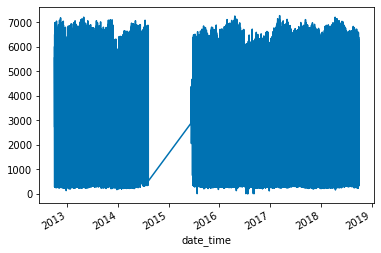

In [10]:
data.set_index('date_time')['traffic_volume'].plot()

As we can exmaine form the graph above we cannot understand a good analysis of the traffic value because of the date format, hence we will parse the date object into year week and month into to explore the traffic value. 


In [11]:
def parse_timestamp(df, datetime):
    df[datetime] = pd.to_datetime(df[datetime])
    df['Year'] = df[datetime].dt.year
    df['Month'] = df[datetime].dt.month
    df['Weekday'] = df[datetime].dt.weekday
    df['Hour'] = df[datetime].dt.hour

In [12]:
parse_timestamp(data, 'date_time') #note from this we still have the date_time col as it is but have additional cols of dates year month week etc
#df['Hour'] = df['Hour'].map(categorize_hour)
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Year,Month,Weekday,Hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10,1,13


In [13]:
data.set_index('date_time',inplace = True) #setting the all merged col as index, 

data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Year,Month,Weekday,Hour
date_time,,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,1,9
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,1,10
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,1,11
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,1,12
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,1,13


# Preparing data for model use


I will be going foreward with cloud, temp to predict traffic volume, we can also use one hot encoding to change varibles for weather into binary, but they donot impact that much towards the traffic volume hence we will not use that. 

In [14]:
# data = pd.read_csv(
#     "https://reed.cs.depaul.edu/peterh/Essays/Metro_Interstate_reduced.csv",
# )


data.drop(columns = ['weather_description','weather_main','snow_1h','rain_1h','holiday','Year','Month'], inplace = True)

data.head() #dropping varibles that wont be used in prediction.

,temp,clouds_all,traffic_volume,Weekday,Hour
date_time,,,,,
2012-10-02 09:00:00,288.28,40,5545,1,9
2012-10-02 10:00:00,289.36,75,4516,1,10
2012-10-02 11:00:00,289.58,90,4767,1,11
2012-10-02 12:00:00,290.13,90,5026,1,12
2012-10-02 13:00:00,291.14,75,4918,1,13


In [15]:
data.drop(columns = ['Weekday','Hour'], inplace = True)

data.head()

,temp,clouds_all,traffic_volume
date_time,,,
2012-10-02 09:00:00,288.28,40,5545
2012-10-02 10:00:00,289.36,75,4516
2012-10-02 11:00:00,289.58,90,4767
2012-10-02 12:00:00,290.13,90,5026
2012-10-02 13:00:00,291.14,75,4918


In [16]:
#data['date_time']=pd.to_datetime(data['date_time'],infer_datetime_format=True)

In [17]:
data.head()

,temp,clouds_all,traffic_volume
date_time,,,
2012-10-02 09:00:00,288.28,40,5545
2012-10-02 10:00:00,289.36,75,4516
2012-10-02 11:00:00,289.58,90,4767
2012-10-02 12:00:00,290.13,90,5026
2012-10-02 13:00:00,291.14,75,4918


In [18]:
test_df = data.tail(4999) #last 4999 used as testing
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4999 entries, 2018-03-06 00:00:00 to 2018-09-30 23:00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            4999 non-null   float64
 1   clouds_all      4999 non-null   int64  
 2   traffic_volume  4999 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 156.2 KB


In [19]:
y_test = test_df['traffic_volume']
X_test = test_df.drop(['traffic_volume'], axis=1) #dropping traffic value from the col

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40575 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            40575 non-null  float64
 1   clouds_all      40575 non-null  int64  
 2   traffic_volume  40575 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 MB


In [21]:
#as we have extracted the values for testing the rest will be used for training and validation
data.drop(data.tail(4999).index,
        inplace = True)
data.info() #after dropping test data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35576 entries, 2012-10-02 09:00:00 to 2018-03-05 23:00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            35576 non-null  float64
 1   clouds_all      35576 non-null  int64  
 2   traffic_volume  35576 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [22]:
#seprat
y = data['traffic_volume']
X = data.drop(['traffic_volume'], axis=1) #dropping traffic value from the col

In [23]:
# train_df = x[0:int(n*0.7)]
# val_df = x[int(n*0.7):int(n*0.9)]

In [24]:
y.describe()

count    35576.000000
mean      3279.625028
std       1984.347829
min          0.000000
25%       1237.000000
50%       3404.000000
75%       4945.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=555,shuffle=False)

In [26]:
X_train.shape

(24903, 2)

In [27]:
X_val.shape

(10673, 2)

In [28]:
# #changing date format
# dataIn['clouds_all']=dataIn['clouds_all'].apply(lambda x: float(x))
# dataIn['traffic_volume']=dataIn['traffic_volume'].apply(lambda x: float(x))

# dataIn['date_time']=pd.to_datetime(dataIn['date_time'],infer_datetime_format=True ) #getting the date format automatcally, as set to True

In [29]:
# dataIn.info()

In [30]:
# #Normalizating the dataset
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(X_train)
# X_train = ss.transform(X_train)
# X_val = ss.transform(X_val)
# X_test = ss.transform(X_test)

# Processing data fro lstm

In [31]:
#we have data every hour, One a day I have 24 data points, we have to take 
window=3
batch_size=32
num_featues=4

inputwidth=7
offset=3

In [32]:
data

,temp,clouds_all,traffic_volume
date_time,,,
2012-10-02 09:00:00,288.28,40,5545
2012-10-02 10:00:00,289.36,75,4516
2012-10-02 11:00:00,289.58,90,4767
2012-10-02 12:00:00,290.13,90,5026
2012-10-02 13:00:00,291.14,75,4918
...,...,...,...
2018-03-05 19:00:00,271.65,90,1117
2018-03-05 20:00:00,271.28,90,844
2018-03-05 21:00:00,271.15,90,753


In [33]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.8)]
val_df = data[int(n*0.8):]
test_df 

num_features = data.shape[1]

In [34]:
val_df.shape

(7116, 3)

In [35]:
train_df.shape

(28460, 3)

In [36]:
column_indices

{'clouds_all': 1, 'temp': 0, 'traffic_volume': 2}

In [37]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

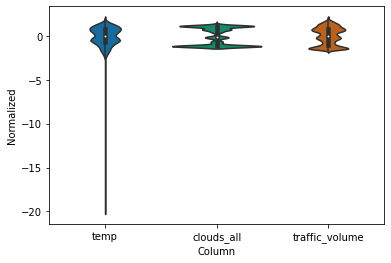

In [38]:
df_std = (data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

ax = sns.violinplot(x='Column', y='Normalized', data=df_std)


Data is normalized, there are no obvious errors

In [39]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [40]:
window_7_1_3 = WindowGenerator(input_width=7, label_width=1, shift=2,
                     label_columns=['traffic_volume'])
window_7_1_3

Total window size: 9
Input indices: [0 1 2 3 4 5 6]
Label indices: [8]
Label column name(s): ['traffic_volume']

In [41]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [42]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:window_7_1_3.total_window_size]),
                           np.array(train_df[100:100+window_7_1_3.total_window_size]),
                           np.array(train_df[200:200+window_7_1_3.total_window_size])])

example_inputs, example_labels = window_7_1_3.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 9, 3)
Inputs shape: (3, 7, 3)
Labels shape: (3, 1, 1)


In [43]:
def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [44]:
window_7_1_3.example = example_inputs, example_labels

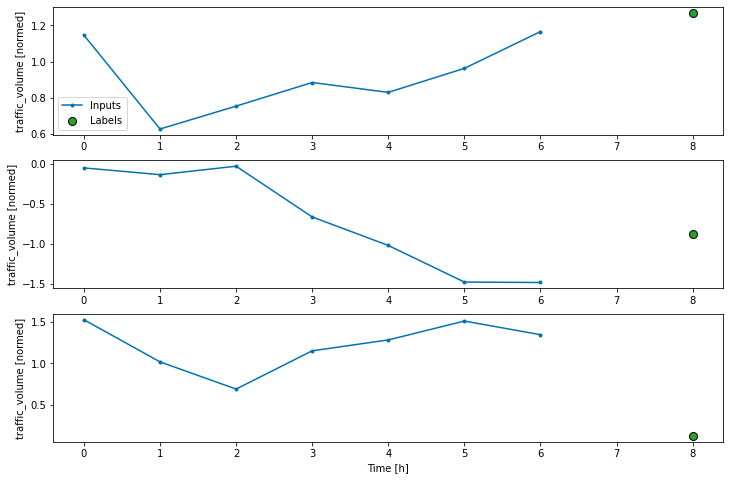

In [45]:
window_7_1_3.plot()

In [46]:
example_inputs, example_labels = window_7_1_3.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 9, 3)
Inputs shape: (3, 7, 3)
Labels shape: (3, 1, 1)


In [47]:
window_7_1_3

Total window size: 9
Input indices: [0 1 2 3 4 5 6]
Label indices: [8]
Label column name(s): ['traffic_volume']

# For baseline model

In [48]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [49]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['traffic_volume'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['traffic_volume']

In [50]:
# baseline = Baseline(label_index=column_indices['traffic_volume'])

# baseline.compile(loss=tf.losses.MeanSquaredError(),
#                  metrics=[tf.metrics.MeanAbsoluteError()])

# val_performance = {}
# performance = {}
# val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

# Rnn model

In [51]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [52]:
print('Input shape:', window_7_1_3.example[0].shape)
print('Output shape:', lstm_model(window_7_1_3.example[0]).shape)

Input shape: (3, 7, 3)
Output shape: (3, 7, 1)


In [53]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [54]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [55]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [56]:
history = compile_and_fit(lstm_model, window_7_1_3)
val_performance = {}
performance = {}
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(window_7_1_3.val)
performance['LSTM'] = lstm_model.evaluate(window_7_1_3.test, verbose=0)

223/223 [==============================] - 2s 7ms/step - loss: 0.2985 - mean_absolute_error: 0.3901


In [57]:
from sklearn import metrics
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [58]:
target_output = np.expand_dims(test_df, axis=0)
predictions = lstm_model.predict(target_output)
print(predictions.shape)

predict = pd.DataFrame(np.concatenate(predictions))
print(predict.head())

mean = train_mean['traffic_volume']
print("Mean:", mean)
std = train_std['traffic_volume']
print("Standardization:", std)

pred_denormalized = []
for i in range(predict.shape[0]):
    denormalized = predict[0][i]*std + mean  # denormalize)
    pred_denormalized.append(denormalized)

predicted = pd.DataFrame(pred_denormalized)
predicted = predicted[8:]
predicted.columns=['prediction']
predicted.index = np.arange(0,len(predicted))

idx = test_df[8:].index
print(idx)
predicted.loc[:,'id'] =  np.arange(1, 4992)
cols = predicted.columns.tolist()
cols = cols[-1:] + cols[:-1]
predicted = predicted[cols]

predicted = predicted.set_index('id')
predicted.to_csv('Umaima_final.csv')

(1, 4999, 1)
          0
0  0.762424
1  0.642243
2  0.582091
3  0.469845
4  0.590766
Mean: 3266.2906535488405
Standardization: 1989.6928366367658
DatetimeIndex(['2018-03-06 08:00:00', '2018-03-06 09:00:00',
               '2018-03-06 10:00:00', '2018-03-06 11:00:00',
               '2018-03-06 12:00:00', '2018-03-06 13:00:00',
               '2018-03-06 14:00:00', '2018-03-06 15:00:00',
               '2018-03-06 16:00:00', '2018-03-06 17:00:00',
               ...
               '2018-09-30 14:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=4991, freq=None)
